### Raw NN
[https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6)


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from exit import NeuralNetwork
from exit.layers import Dense, BatchNorm
from exit.initializers import GlorotUniform, GlorotNormal
from exit.activations import Relu, Sigmoid
from exit.losses import crossEntropy, l2
from exit.optimizers import Momentum, RMSProp, Adam, GradientDescent

### Regression

loss 0 : tensor(1081.2181, grad_fn=<MeanBackward1>)
loss 99 : tensor(20.4737, grad_fn=<MeanBackward1>)
loss 198 : tensor(18.1005, grad_fn=<MeanBackward1>)
loss 297 : tensor(15.8570, grad_fn=<MeanBackward1>)
loss 396 : tensor(13.7122, grad_fn=<MeanBackward1>)
loss 495 : tensor(11.6554, grad_fn=<MeanBackward1>)
loss 594 : tensor(9.6963, grad_fn=<MeanBackward1>)
loss 693 : tensor(7.8618, grad_fn=<MeanBackward1>)
loss 792 : tensor(6.1906, grad_fn=<MeanBackward1>)
loss 891 : tensor(4.7220, grad_fn=<MeanBackward1>)
loss 990 : tensor(3.4849, grad_fn=<MeanBackward1>)


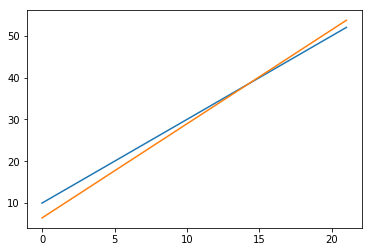

In [3]:
nn = NeuralNetwork()

input = torch.arange(0, 22, 1).view(-1, 1).float()
output = input*2+10
nn.sequence(
    Dense(4), Relu(),
    Dense(1),
)
for i in range(1000):
    predict = nn.train(input, output, l2, learning_rate=0.0003)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])
        
# need to use data to avoid error 
# "Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead."
output_predict = nn.predict(input).data.numpy() 

input = input.numpy()
output = output.numpy()

plt.plot(input, output)
plt.plot(input, output_predict)

### Regression Deep

loss 0 : tensor(19777030., grad_fn=<MeanBackward1>)
loss 99 : tensor(1114777.1250, grad_fn=<MeanBackward1>)
loss 198 : tensor(893295.3750, grad_fn=<MeanBackward1>)
loss 297 : tensor(648684.9375, grad_fn=<MeanBackward1>)
loss 396 : tensor(422630.2500, grad_fn=<MeanBackward1>)
loss 495 : tensor(261921.4219, grad_fn=<MeanBackward1>)
loss 594 : tensor(165572.5938, grad_fn=<MeanBackward1>)
loss 693 : tensor(110030.4766, grad_fn=<MeanBackward1>)
loss 792 : tensor(77116.7734, grad_fn=<MeanBackward1>)
loss 891 : tensor(56826.6016, grad_fn=<MeanBackward1>)
loss 990 : tensor(43699.6250, grad_fn=<MeanBackward1>)


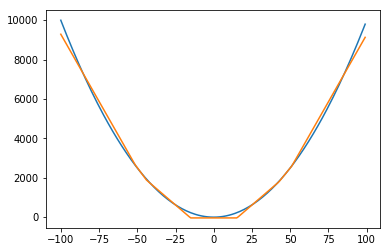

In [4]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotNormal())

input = torch.arange(-100,100).view(-1, 1).float()
output = torch.pow(input, 2) - 5

nn.sequence(
    Dense(6), Relu(),
    Dense(1),
)
for i in range(1000):
    predict = nn.train(input, output, l2, learning_rate=0.1)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])
        
output_predict = nn.predict(input).data.numpy() 
input = input.numpy()
output = output.numpy()

plt.plot(input, output)
plt.plot(input, output_predict)

tensor([[-1.9302,  2.1685,  5.1140,  2.0352, -2.2039, -5.1173]],
       requires_grad=True)

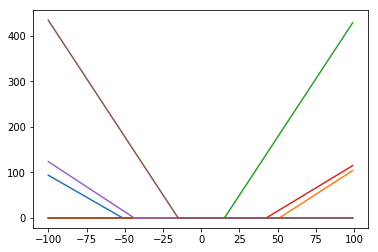

In [5]:
# visualize activation functions
input_tensor = torch.from_numpy(input)
for i in range(6): 
    w = nn._network[0]._weights[0, i].view(1,1)
    b = nn._network[0]._bias[0, i].view(1,1)
    z = input_tensor.mm(w) + b
    a = nn._network[1].feed_forward(z, is_predict=False)
    plt.plot(input, a.data.numpy())
nn._network[0]._weights

### Regression with Batch Norm

In [6]:
def rand_uniform(min, max, shape):
    return abs(max-min) * torch.rand(shape) + min

#### Without batch norm

loss 0 : tensor(5744.4956, grad_fn=<MeanBackward1>)
loss 99 : tensor(138.3054, grad_fn=<MeanBackward1>)


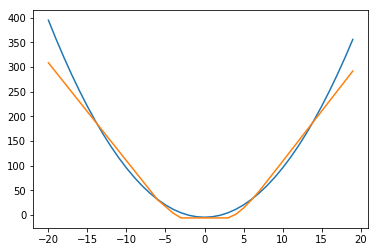

In [7]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotUniform())

nn.sequence(
    Dense(6), Relu(),
    Dense(1),
)
for i in range(100):
    min = np.random.uniform(-20, -10)
    max = np.random.uniform(10, 20)
    input = rand_uniform(min, max, (200, 1))
    output = torch.pow(input, 2) - 5
    
    predict = nn.train(input, output, l2, learning_rate=.1)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

input = torch.arange(-20,20).view(-1, 1).float()
output = torch.pow(input, 2) - 5

output_predict = nn.predict(input).data.numpy()
input = input.numpy()
output = output.numpy()

plt.plot(input, output)
plt.plot(input, output_predict)

#### With Batch norm

loss 0 : tensor(16744.3418, grad_fn=<MeanBackward1>)
loss 99 : tensor(164.6736, grad_fn=<MeanBackward1>)


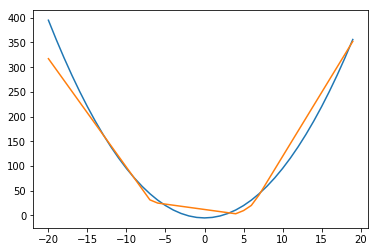

In [8]:
nn = NeuralNetwork(optimizer=Adam(), initializer=GlorotUniform())

nn.sequence(
    Dense(6), BatchNorm(), Relu(),
    Dense(1),
)
for i in range(100):
    min = np.random.uniform(-20, -10)
    max = np.random.uniform(10, 20)
    input = rand_uniform(min, max, (200, 1))
    output = torch.pow(input, 2) - 5
    
    predict = nn.train(input, output, l2, learning_rate=.1)
    if i%99 is 0:
        print(f'loss {i} :', predict['loss'])

input = torch.arange(-20,20).view(-1, 1).float()
output = torch.pow(input, 2) - 5

output_predict = nn.predict(input).data.numpy() 
input = input.numpy()
output = output.numpy()

plt.plot(input, output)
plt.plot(input, output_predict)

### Classifiaction

In [9]:
nn = NeuralNetwork()

input = torch.linspace(0, 20, 100).view(-1, 1).float()
output = (input*2+10 > 30).int().float()

nn.sequence(
    Dense(1),
    Sigmoid()
)
for i in range(1000):
    predict = nn.train(input, output, crossEntropy, learning_rate=1)
    if i%99 is 0:
        print(f'loss: {i} = ', predict['loss'])

loss: 0 =  tensor(0.6165, grad_fn=<NegBackward>)
loss: 99 =  tensor(5.6457, grad_fn=<NegBackward>)
loss: 198 =  tensor(1.4664, grad_fn=<NegBackward>)
loss: 297 =  tensor(0.2535, grad_fn=<NegBackward>)
loss: 396 =  tensor(0.4020, grad_fn=<NegBackward>)
loss: 495 =  tensor(0.1454, grad_fn=<NegBackward>)
loss: 594 =  tensor(0.1535, grad_fn=<NegBackward>)
loss: 693 =  tensor(0.0769, grad_fn=<NegBackward>)
loss: 792 =  tensor(0.0623, grad_fn=<NegBackward>)
loss: 891 =  tensor(0.0411, grad_fn=<NegBackward>)
loss: 990 =  tensor(0.0339, grad_fn=<NegBackward>)


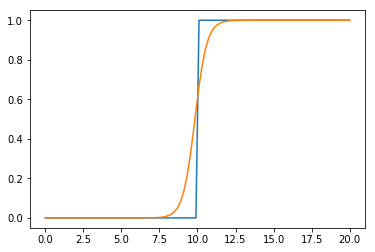

In [10]:
output_predict = nn.predict(input).data.numpy() 
input = input.numpy()
output = output.numpy()

plt.plot(input, output)
plt.plot(input, output_predict)